In [1]:
# Spam Email Detection
# importing datasets through colab

from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


In [2]:
# PYTHON LIBRARIES WE WILL BE USING

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [3]:
# LOADING DATA SET

data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
# DISPLAYING THE ENTIRE DATASET

pd.set_option('display.max_columns', None)
print("Complete Dataset:")
print(data)


Complete Dataset:
        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1          

In [5]:
# DROPPIMG COLUMNS WITH NAN VALUES

data_cleaned = data.dropna(axis=1)

# DiISPLAYING THE CLEAN DATASET

print("Cleaned Dataset:")
print(data_cleaned)


Cleaned Dataset:
        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [6]:
# Fill NaN values with a specific value (e.g., 0)

data_filled = data.fillna(0)

# Displaying the filled dataset

print("Filled Dataset:")
print(data_filled)


Filled Dataset:
        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...          0   
1      ham                      Ok lar... Joking wif u oni...          0   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...          0   
3      ham  U dun say so early hor... U c already then say...          0   
4      ham  Nah I don't think he goes to usf, he lives aro...          0   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...          0   
5568   ham              Will Ì_ b going to esplanade fr home?          0   
5569   ham  Pity, * was in mood for that. So...any other s...          0   
5570   ham  The guy did some bitching but I acted like i'd...          0   
5571   ham                         Rofl. Its true to its name          0   

     Unnamed: 3 Unnamed: 4  
0             0          0  
1            

In [7]:
# Data preprocessing

data['v1'] = data['v1'].map({'spam': 1, 'ham': 0})

In [8]:
# Spliting the data into training and testing sets

X = data['v2']
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Vectorizing the email text using TF-IDF

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
# Training with a Naive Bayes classifier

clf_nb = MultinomialNB()
clf_nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [11]:
# Training with an SVM classifier

clf_svm = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
clf_svm.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [12]:
# Training with a Decision Tree classifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_tfidf, y_train)


DecisionTreeClassifier()

In [13]:
# Making predictions

y_pred_nb = clf_nb.predict(X_test_tfidf)
y_pred_svm = clf_svm.predict(X_test_tfidf)
y_pred_dt = clf_dt.predict(X_test_tfidf)


In [14]:
# The Naive Bayes model

accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Classifier Results:")
print("Accuracy: {:.2f}%".format(accuracy_nb * 100))
print("Confusion Matrix:\n", conf_matrix_nb)
print("Classification Report:\n", report_nb)

Naive Bayes Classifier Results:
Accuracy: 96.23%
Confusion Matrix:
 [[965   0]
 [ 42 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [15]:
# The SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("\nSVM Classifier Results:")
print("Accuracy: {:.2f}%".format(accuracy_svm * 100))
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", report_svm)


SVM Classifier Results:
Accuracy: 98.30%
Confusion Matrix:
 [[963   2]
 [ 17 133]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [16]:
# The Decision Tree model

accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("\nDecision Tree Classifier Results:")
print("Accuracy: {:.2f}%".format(accuracy_dt * 100))
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", report_dt)



Decision Tree Classifier Results:
Accuracy: 96.23%
Confusion Matrix:
 [[949  16]
 [ 26 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       965
           1       0.89      0.83      0.86       150

    accuracy                           0.96      1115
   macro avg       0.93      0.91      0.92      1115
weighted avg       0.96      0.96      0.96      1115



In [17]:
# Displaying the confusion matrices for each classifier

print("\nConfusion Matrix for Naive Bayes:\n", conf_matrix_nb)
print("\nConfusion Matrix for SVM:\n", conf_matrix_svm)
print("\nConfusion Matrix for Decision Tree:\n", conf_matrix_dt)


Confusion Matrix for Naive Bayes:
 [[965   0]
 [ 42 108]]

Confusion Matrix for SVM:
 [[963   2]
 [ 17 133]]

Confusion Matrix for Decision Tree:
 [[949  16]
 [ 26 124]]


In [18]:
# Visualizing Confusion Matrices
import matplotlib.pyplot as plt
import seaborn as sns


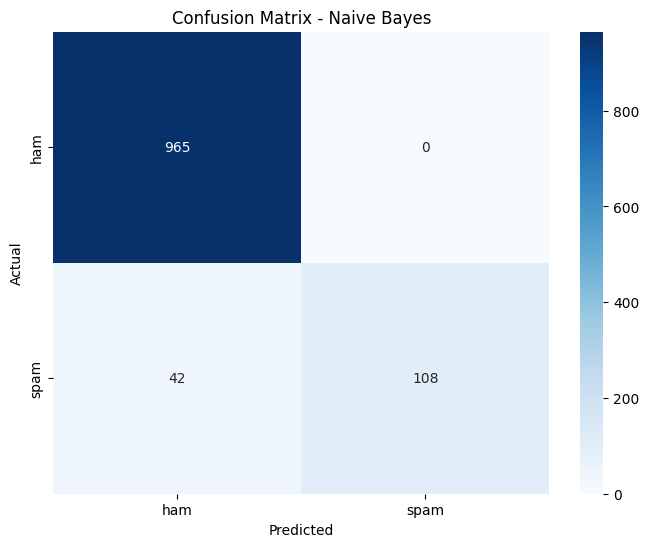

In [19]:
# Confusion Matrix for Naive Bayes

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

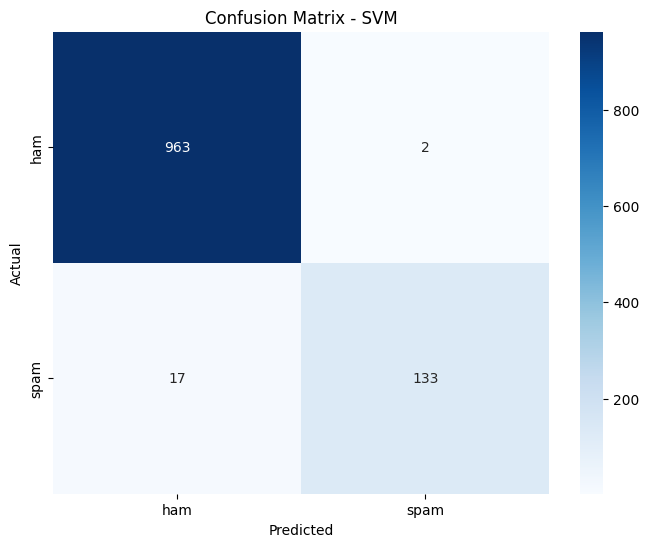

In [20]:
# Confusion Matrix for SVM

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

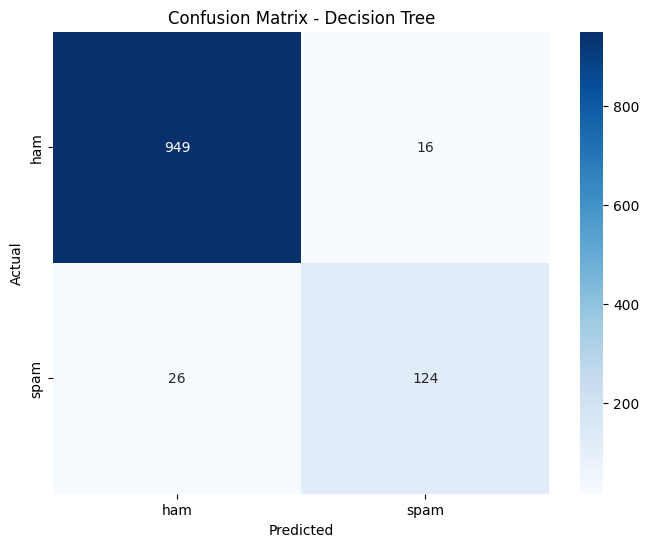

In [21]:
# Confusion Matrix for Decision Tree

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# Bar plot for Naive Bayes predictions

plt.figure(figsize=(10, 6))
sns.countplot(x='Naive Bayes Prediction', data=data, palette='viridis')
plt.title('Naive Bayes Predictions on the Dataset')
plt.xlabel('Predicted Label (0: ham, 1: spam)')
plt.ylabel('Count')
plt.show()

ValueError: Could not interpret value `Naive Bayes Prediction` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Bar plot for SVM predictions
plt.figure(figsize=(10, 6))
sns.countplot(x='SVM Prediction', data=data, palette='viridis')
plt.title('SVM Predictions on the Dataset')
plt.xlabel('Predicted Label (0: ham, 1: spam)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Bar plot for Decision Tree predictions
plt.figure(figsize=(10, 6))
sns.countplot(x='Decision Tree Prediction', data=data, palette='viridis')
plt.title('Decision Tree Predictions on the Dataset')
plt.xlabel('Predicted Label (0: ham, 1: spam)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Bar plot for Accuracy Comparison

accuracies = [accuracy_nb, accuracy_svm, accuracy_dt]
classifiers = ['Naive Bayes', 'SVM', 'Decision Tree']

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.show()

In [ ]:
# Saving all the trained models

joblib.dump(clf_nb, 'naive_bayes_model.pkl')
joblib.dump(clf_svm, 'svm_model.pkl')
joblib.dump(clf_dt, 'decision_tree_model.pkl')


In [ ]:
# Save the vectorizer as well
joblib.dump(vectorizer, 'vectorizer.pkl')

In [ ]:
print("Models and vectorizer saved successfully.")

In [ ]:
# Load your email dataset into a DataFrame
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
# Vectorizing the email text (v2) in your dataset using TF-IDF
# 'v2' contains the email text

vectorizer = TfidfVectorizer()
X_df_tfidf = vectorizer.fit_transform(data['v2'])  # 'v2' contains the email text


In [ ]:
# Loading the trained models and vectorizer

clf_nb = joblib.load('naive_bayes_model.pkl')  # Naive Bayes model
clf_svm = joblib.load('svm_model.pkl')  # SVM model
clf_dt = joblib.load('decision_tree_model.pkl')  # Decision Tree model
vectorizer = joblib.load('vectorizer.pkl')


In [ ]:
# Vectorize the email text in the dataset
X_data_tfidf = vectorizer.transform(data['v2'])  # 'v2' contains the email text


In [ ]:
# Making predictions for the entire dataset using the three classifiers

predictions_nb = clf_nb.predict(X_data_tfidf)  # Naive Bayes
predictions_svm = clf_svm.predict(X_data_tfidf)  # SVM
predictions_dt = clf_dt.predict(X_data_tfidf)  # Decision Tree


In [ ]:
# Adding the predicted labels to the DataFrame

data['Naive Bayes Prediction'] = predictions_nb
data['SVM Prediction'] = predictions_svm
data['Decision Tree Prediction'] = predictions_dt

In [ ]:
# Saving the dataset with predictions to a new CSV file

data.to_csv('spam.csv', index=False)

In [ ]:
# Filter for emails classified as spam by Naive Bayes

spam = data[data['Naive Bayes Prediction'] == 1]


In [ ]:
# Filter for emails classified as spam by SVM

spam = data[data['SVM Prediction'] == 1]

In [ ]:
# Filter for emails classified as spam by Decision Tree

spam = data[data['Decision Tree Prediction'] == 1]


In [ ]:
# Displaying the spam emails for each classifier

print("Spam Emails Classified by Naive Bayes:\n", spam[['v2', 'Naive Bayes Prediction']])
print("\nSpam Emails Classified by SVM:\n", spam[['v2', 'SVM Prediction']])
print("\nSpam Emails Classified by Decision Tree:\n", spam[['v2', 'Decision Tree Prediction']])

In [ ]:
# Loading the trained models and vectorizer

clf_nb = joblib.load('naive_bayes_model.pkl')  # Naive Bayes model
clf_svm = joblib.load('svm_model.pkl')  # SVM model
clf_dt = joblib.load('decision_tree_model.pkl')  # Decision Tree model
vectorizer = joblib.load('vectorizer.pkl')

In [24]:
# The email text that we will use to check the model

email_text = ' hello '
'


SyntaxError: unterminated string literal (detected at line 4) (<ipython-input-24-faff4e587c05>, line 4)

In [ ]:
# Vectorizing the email text using the same TF-IDF vectorizer

email_tfidf = vectorizer.transform([email_text])

In [ ]:
# making final predictions using the three classifiers

prediction_nb = clf_nb.predict(email_tfidf)[0]  # Naive Bayes
prediction_svm = clf_svm.predict(email_tfidf)[0]  # SVM
prediction_dt = clf_dt.predict(email_tfidf)[0]  # Decision Tree

# displaying the predictions and checking whether its 'spam' or 'not spam'

print("Naive Bayes Prediction:", "Spam" if prediction_nb == 1 else "Not Spam")
print("SVM Prediction:", "Spam" if prediction_svm == 1 else "Not Spam")
print("Decision Tree Prediction:", "Spam" if prediction_dt == 1 else "Not Spam")

In [ ]:
#                                                                                                     * THANK YOU *